In [60]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def create_model_type_name(row,columns):
    strings = [str(row[col]) for col in columns if pd.notna(row[col])]
    return '-'.join(strings)

In [62]:
df_results = pd.read_csv("../Results/InvestmentModelResults/Loop_4models_indirect_neighbors_8760.csv")

In [63]:
df_results["geoscope"]

0    DE00_NL00_FR00_UK00_BE00_LUG1
1                            A_l_l
2                              N_A
3    DE00_NL00_FR00_UK00_BE00_LUG1
4    DE00_NL00_FR00_UK00_BE00_LUG1
5                            A_l_l
6                            A_l_l
7    DE00_NL00_FR00_UK00_BE00_LUG1
8                            A_l_l
Name: geoscope, dtype: object

In [64]:
geo_scope_map = {
    'A_l_l': 'All',
    'DE00_NL00_FR00_UK00_BE00_LUG1': 'DN',
    'N_A': ''
}
df_results["geoscope_m"] = df_results["geoscope"].map(geo_scope_map)

# List of columns to consider for joining
columns_to_join = ['type', 'trans_cap_other', 'geoscope_m']

# Apply the function row-wise to create the new column
df_results['name'] = df_results.apply(create_model_type_name, args=(columns_to_join,), axis=1)

name_map = {
    'NTC-1.0e10-DN': 'SN-DN',
    'NTC-1.0e10-All': 'SN-All',
    'NTC-S-All': "NTC-All",
    'NTC-S-DN': "NTC-DN",
    'TCPC-All': "TCPC",
    
}
df_results['Model Type'] = df_results["name"].replace(name_map)


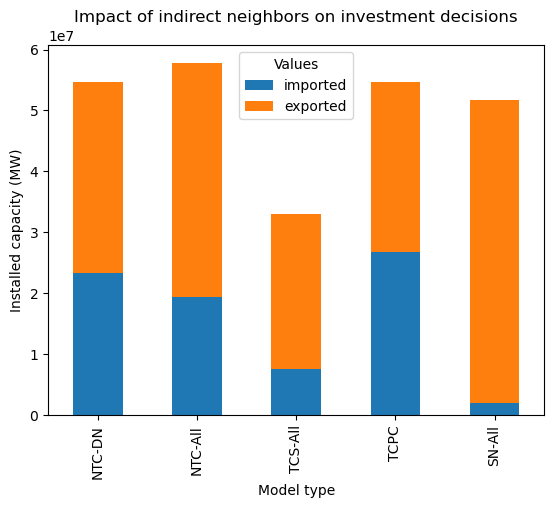

In [69]:
filter_condition = (df_results["geoscope"] == "A_l_l") | (df_results["type"] == "NTC")
# Define the order in which you want the types to appear
type_order = ["NTC-DN", "NTC-All", "TCS-All", "TCPC","SN-All"]
filtered_df = filtered_df = df_results[filter_condition].set_index("Model Type").reindex(type_order).reset_index()


vals = ["CCGT", "OCGT", "PV", "w_off", "w_on"]
vals = ["imported","exported"]


filtered_df.plot.bar(x="Model Type", y=vals, stacked=True)

plt.xlabel('Model type')
plt.ylabel('Installed capacity (MW)')
plt.title('Impact of indirect neighbors on investment decisions')
plt.legend(title='Values')
#plt.show()
plt.savefig("../Results/Figures/FY_analysis/IndirectNeighbors/Installed_capacities_stacked_bar_IN.png")
